In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [104]:
df = pd.read_csv(r'yield_df.csv')
df.head(1)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37


In [105]:
df = df.drop('Unnamed: 0', axis=1)

In [106]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [107]:
df.shape

(28242, 7)

In [108]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [110]:
int(df.duplicated().sum())

2310

In [111]:
df.drop_duplicates(inplace=True)

In [112]:
int(df.duplicated().sum())

0

In [113]:
df['average_rain_fall_mm_per_year']

0        1485.0
1        1485.0
2        1485.0
3        1485.0
4        1485.0
          ...  
28237     657.0
28238     657.0
28239     657.0
28240     657.0
28241     657.0
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: float64

In [114]:
def isStr(x):
    try :
        float(x)
        return False
    except:
        return True

In [115]:
to_drop = df['average_rain_fall_mm_per_year'].apply(isStr)
to_drop = df[to_drop].index
df.drop(to_drop, inplace=True)

In [116]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


<Axes: xlabel='count', ylabel='Area'>

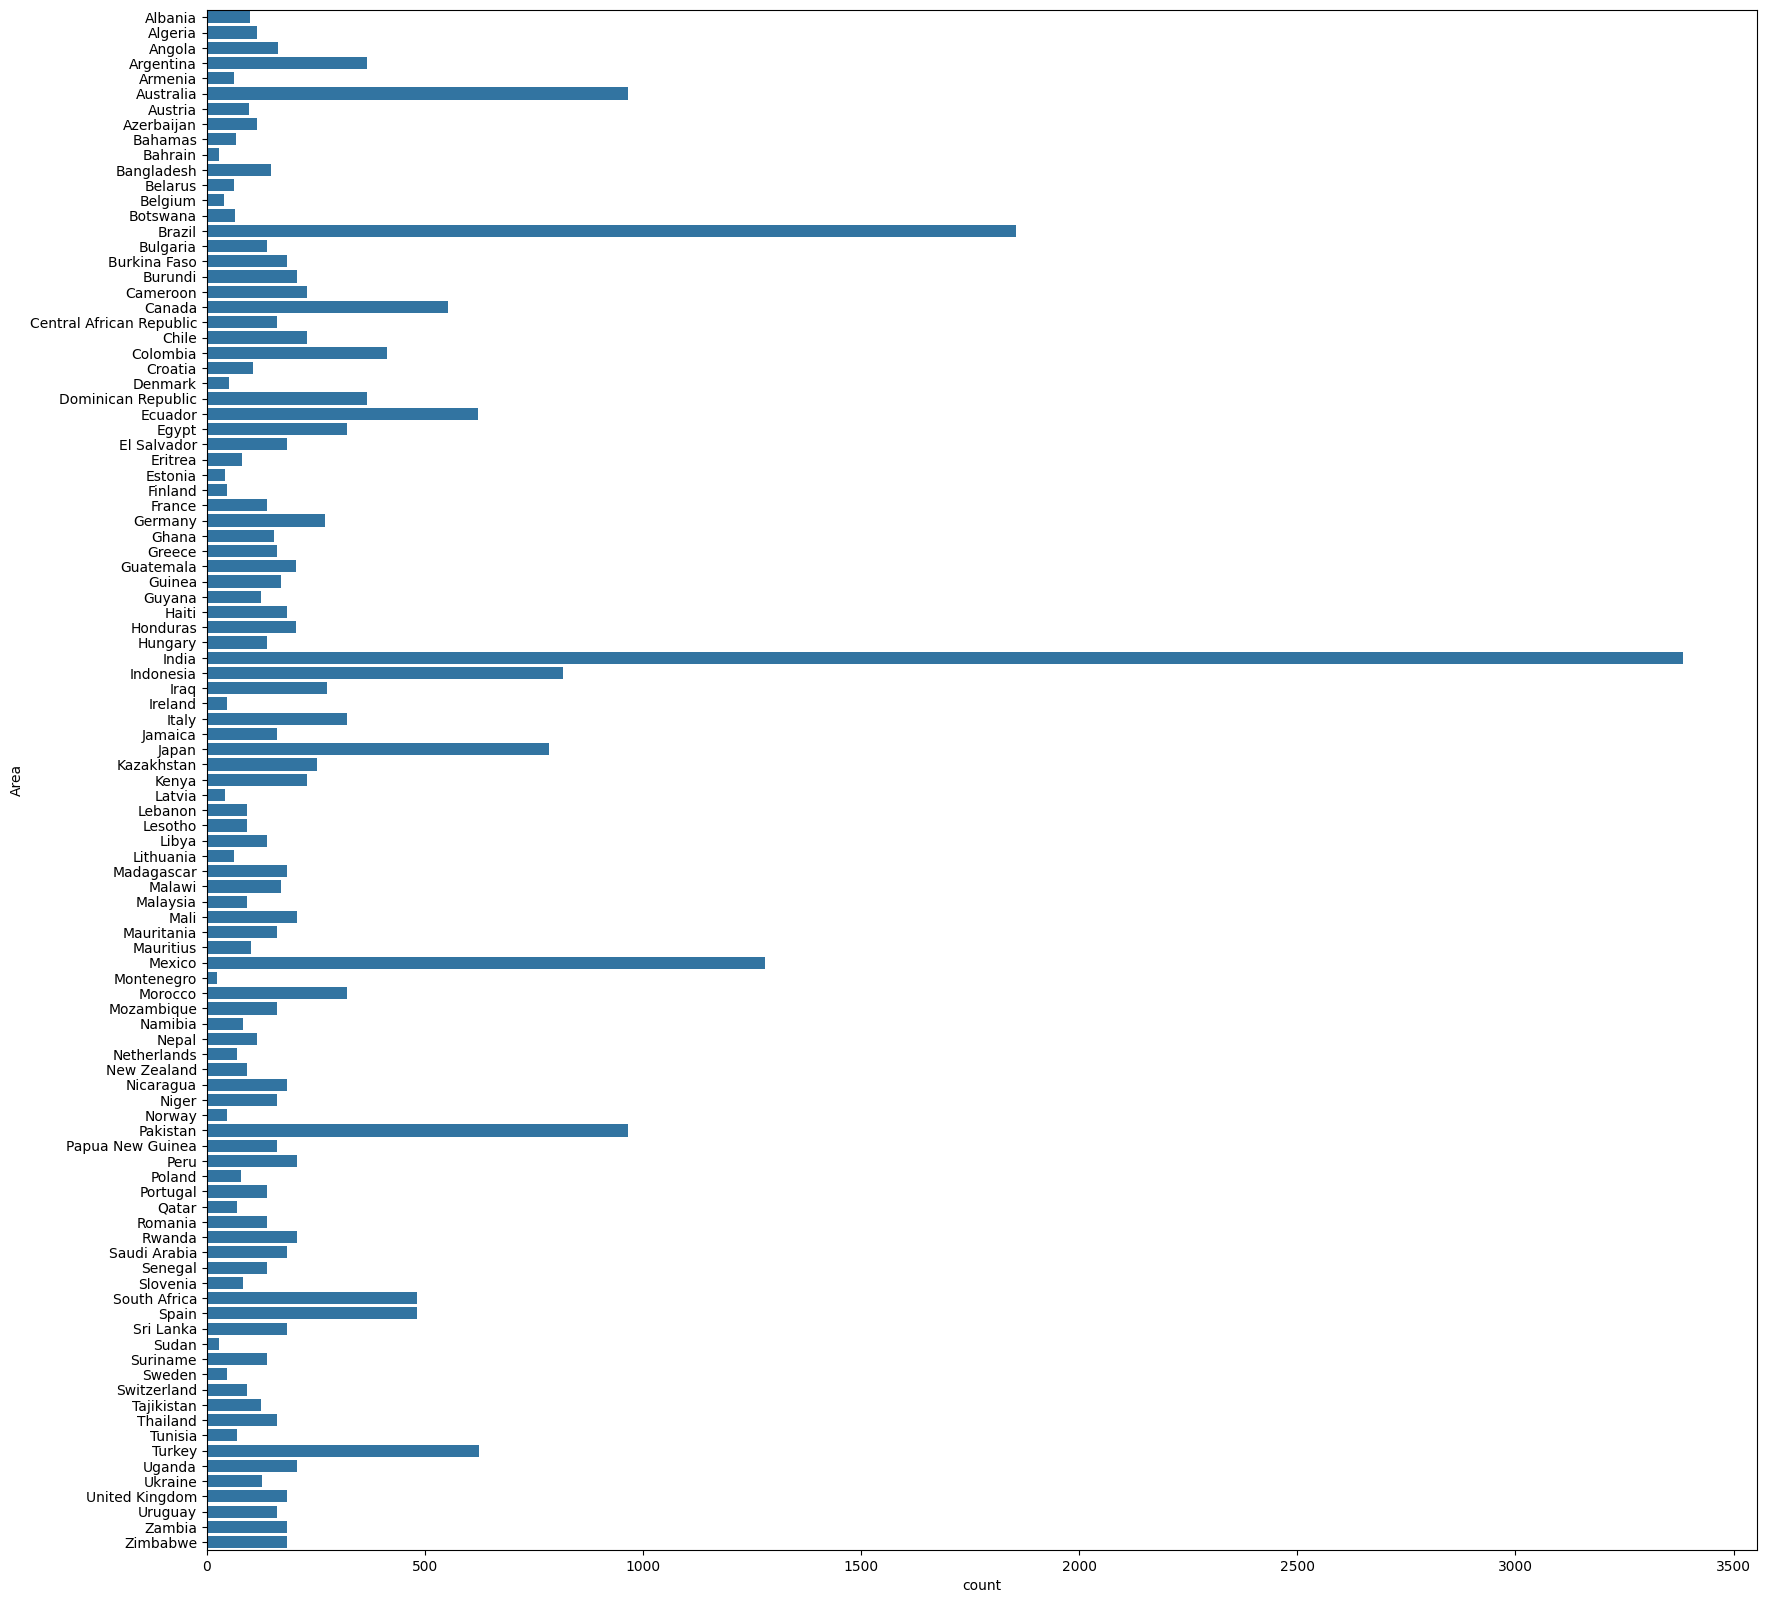

In [117]:
plt.figure(figsize=(20,20))
sns.countplot(y=df['Area'])

In [118]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

1996196943


<Axes: >

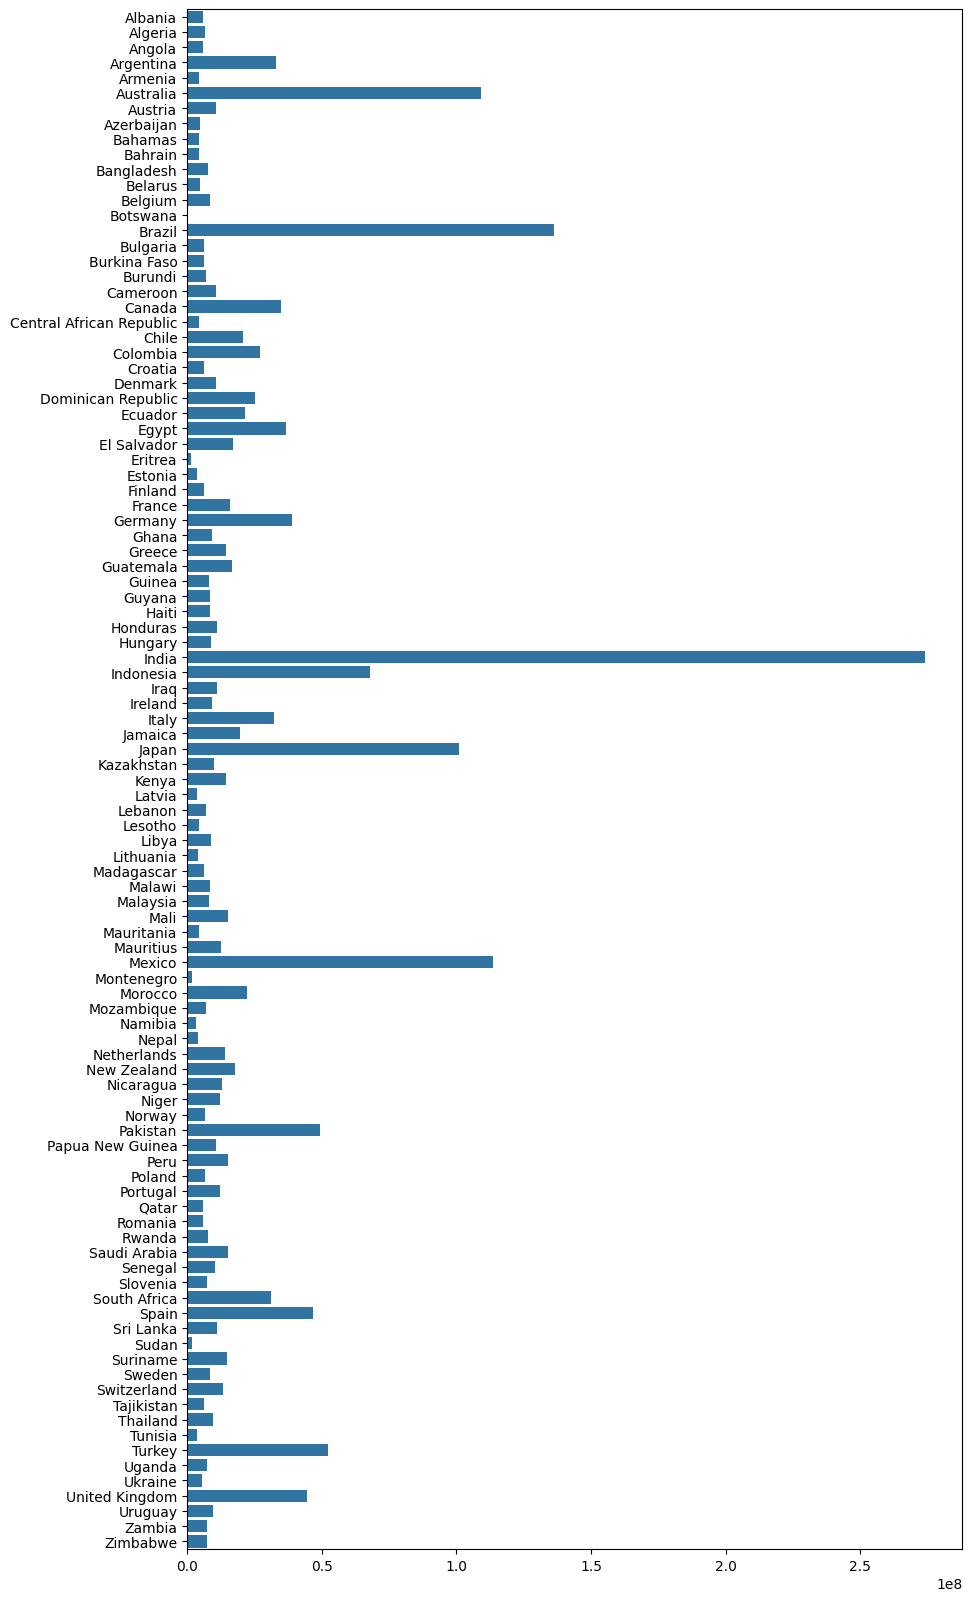

In [119]:
print(int(df['hg/ha_yield'].sum()))
plt.figure(figsize=(10,20))
sns.barplot(x=yield_per_country,y=country)

Item
Potatoes                3956
Maize                   3824
Wheat                   3539
Rice, paddy             3091
Soybeans                2940
Sorghum                 2770
Sweet potatoes          2593
Cassava                 1889
Yams                     774
Plantains and others     556
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Item'>

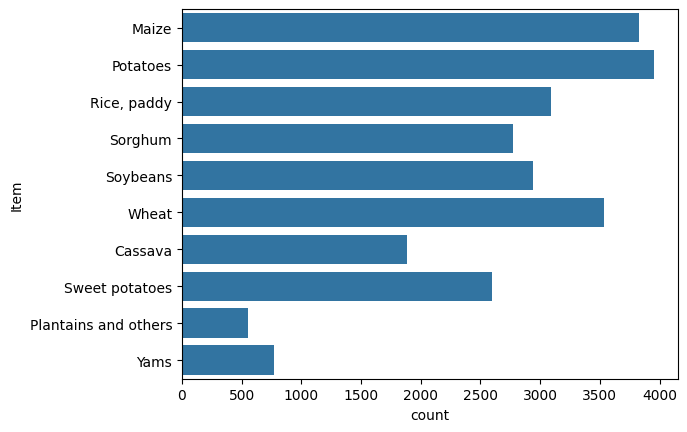

In [120]:
print(df['Item'].value_counts())
sns.countplot(y=df['Item'])

1996196943


<Axes: >

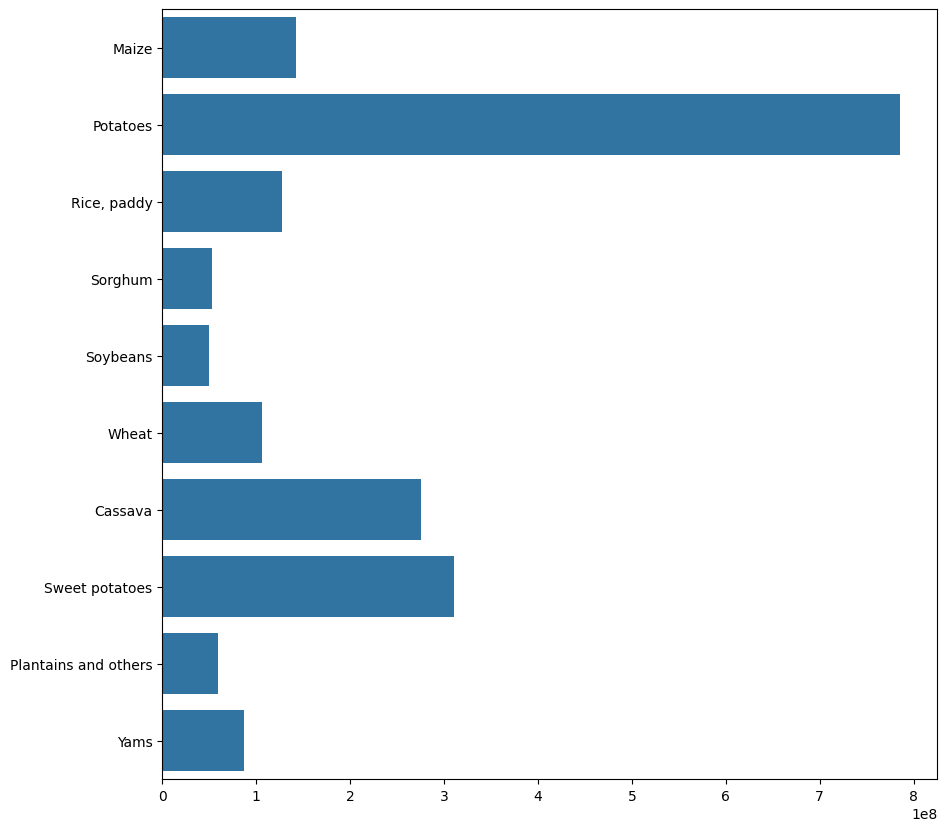

In [121]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())
print(int(df['hg/ha_yield'].sum()))
plt.figure(figsize=(10,10))
sns.barplot(x=yield_per_crop,y=crops)

In [122]:
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20745, 6) (5187, 6) (20745,) (5187,)


In [125]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()

In [126]:
X_train.head(1)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
24234,Saudi Arabia,Sorghum,2000,59.0,3024.11,26.55


In [127]:
preprocessor = ColumnTransformer(
    transformers=[
        ('oneHotEncoder',ohe,[0,1]),
        ('standardization',scaler,[2,3,4,5])
    ],
    remainder='passthrough'
    )

In [128]:
preprocessor

,transformers,"[('oneHotEncoder', ...), ('standardization', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [129]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)

(20745, 113) (5187, 113)


In [130]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [131]:
models = {
    'lr': LinearRegression(),
    'lasso': Lasso(),
    'ridge': Ridge(),    
    'knnr': KNeighborsRegressor(),
    'dtr': DecisionTreeRegressor()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name}:")
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))
    print("\n")

lr:
Mean Absolute Error: 29920.752815368676
Mean Squared Error: 1821709286.8256173
R^2 Score: 0.7486566400660015




c:\Users\yogesh.gowda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.317e+10, tolerance: 1.482e+10
  model = cd_fast.sparse_enet_coordinate_descent(


lasso:
Mean Absolute Error: 29907.604370717847
Mean Squared Error: 1822234158.2996464
R^2 Score: 0.7485842229351399


ridge:
Mean Absolute Error: 29875.454712921808
Mean Squared Error: 1822540936.721895
R^2 Score: 0.7485418963575895


knnr:
Mean Absolute Error: 4869.092616155774
Mean Squared Error: 128225870.21132061
R^2 Score: 0.9823085267872056


dtr:
Mean Absolute Error: 4110.211683053788
Mean Squared Error: 166381325.41353384
R^2 Score: 0.9770441740281293




In [132]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_scaled, y_train)
y_pred = dtr.predict(X_test_scaled)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print(dtr.predict(X_test_scaled))

Mean Absolute Error: 4158.366685945633
Mean Squared Error: 168104774.2051282
R^2 Score: 0.9768063877835917
[154330.  15838.  72614. ...  52692.   9621. 132600.]


In [133]:
def prediction(Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp):
    input_data_as_numpy_array = np.array([[Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp]])
    std_data = preprocessor.transform(input_data_as_numpy_array)
    prediction = dtr.predict(std_data).reshape(1,-1)
    return prediction[0]

In [134]:
Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp = 'Albania','Maize',1990,1485.0,121.0,16.37
result = prediction(Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp)

c:\Users\yogesh.gowda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\yogesh.gowda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [135]:
float(result)

C:\Users\yogesh.gowda\AppData\Local\Temp\ipykernel_24904\2464635639.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(result)


36613.0

In [136]:
import pickle
pickle.dump(preprocessor, open('preprocessor.pkl', 'wb'))
pickle.dump(dtr, open('dtr.pkl', 'wb'))